## 風を描く

風はベクトル量なので，矢印で描くことが多い。

風のデータには，京都大学生存圏研究所の[グローバル大気観測データ](http://database.rish.kyoto-u.ac.jp/arch/glob-atmos/)から提供されている[NCEP再解析データ](http://database.rish.kyoto-u.ac.jp/arch/ncep/)を用いる。
[月平均気候値](http://database.rish.kyoto-u.ac.jp/arch/ncep/data/ncep.reanalysis.derived/pressure/)から東西風（uwnd.mon.ltm.nc）と南北風（vwnd.mon.ltm.nc）をダウンロードする。

In [1]:
import netCDF4 as nc4
fu = nc4.Dataset('uwnd.mon.ltm.nc')

データセットの次元をしらべてみる。

In [2]:
list(fu.dimensions)

['lon', 'lat', 'level', 'time', 'nbnds']

データセットに含まれている変数名を表示する。

In [3]:
list(fu.variables)

['level', 'lat', 'lon', 'time', 'climatology_bounds', 'uwnd', 'valid_yr_count']

In [4]:
import numpy as np
lon = np.array(fu.variables['lon'])
lat = np.array(fu.variables['lat'])
plev = np.array(fu.variables['level'])

In [5]:
plev

array([ 1000.,   925.,   850.,   700.,   600.,   500.,   400.,   300.,
         250.,   200.,   150.,   100.,    70.,    50.,    30.,    20.,
          10.], dtype=float32)

In [6]:
np.where(plev==850)

(array([2], dtype=int64),)

8月の850 hPaの風を描くことにする。南北風のデータセットも開き読み込む。

In [7]:
uwnd = fu.variables['uwnd'][7][np.where(plev==850)]
fv = nc4.Dataset('vwnd.mon.ltm.nc')
vwnd = fv.variables['vwnd'][7][np.where(plev==850)]

早速描画してみよう。

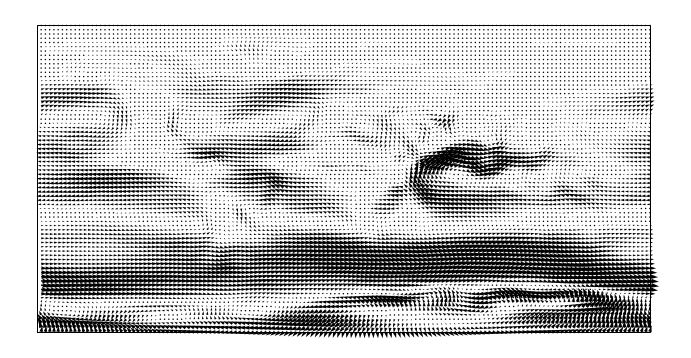

In [8]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

plt.figure(figsize=(12,8))

ax = plt.axes(projection=ccrs.PlateCarree())

plt.quiver(lon, lat, uwnd[0,], vwnd[0,], transform = ccrs.PlateCarree())
plt.show()

データ数が多くてなんだかよく分からない。配列のスライスを利用して，間引きをする。4つおきにしよう。

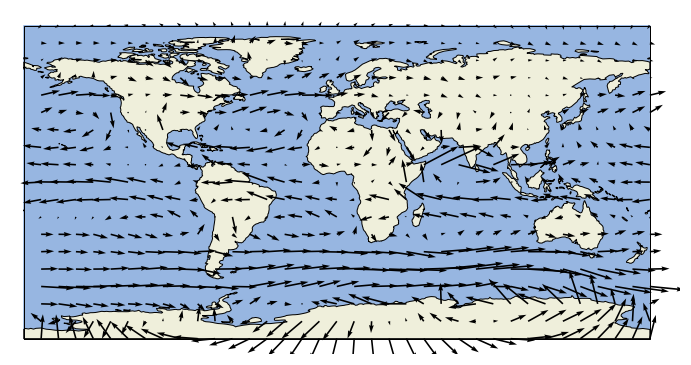

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.figure(figsize=(12,8))

ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.OCEAN, zorder=0)
ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')

plt.quiver(lon[::4], lat[::4], uwnd[0,::4,::4], vwnd[0,::4,::4])

plt.show()